<a href="https://colab.research.google.com/github/jangn1/Skyline-Math-200/blob/main/RESEARCH_QUESTION_2_of_Python_Notebook_Setup_by_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # _2:_ : Include question here: Is there an association between current weight in pounds and if someone has been in the military?



In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1: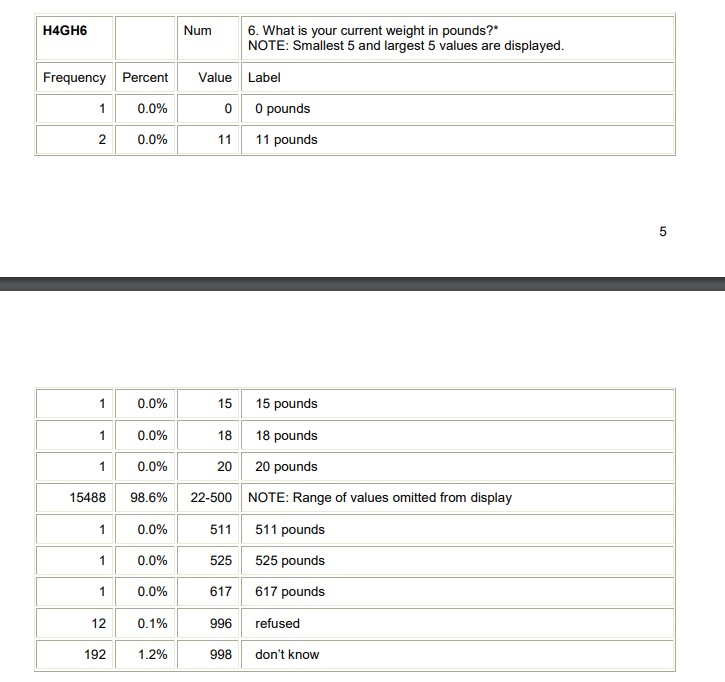

In [74]:
#Manage data for variable 1 (current_weight)

In [79]:
#Check the data type for H4GH6
df['H4GH6'].dtype

dtype('O')

In [80]:
#Create new variable 'current_weight' and check the dtype
df['current_weight'] = df['H4GH6']
df['current_weight'].dtype

dtype('O')

In [81]:
#Change data type to numeric (integer)
df['current_weight'] = pd.to_numeric( df['current_weight'] , errors='coerce' )
df['current_weight'].dtype

dtype('float64')

In [82]:
#Remove missing values and refused and I don't know (Check max)
df['current_weight'] = df['current_weight'].loc[ df['current_weight'] < 996]
df['current_weight'].max()

525.0

In [83]:
#Check average
df['current_weight'].mean()

184.05004965243296

In [84]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
#import researchPy
import researchpy as rp

In [88]:
#Create summary stats using ResearchPy
rp.summarize(df['current_weight'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,current_weight,5035,184.05,178.0,2434.1699,49.3373,0.6953,"[182.6869, 185.4132]"


In [89]:
#Use describe()
df['current_weight'].describe()

count    5035.000000
mean      184.050050
std        49.337308
min        18.000000
25%       150.000000
50%       178.000000
75%       211.000000
max       525.000000
Name: current_weight, dtype: float64

In [ ]:
#Graphs and tables or statistics

In [90]:
import seaborn as sns

<Axes: xlabel='current_weight', ylabel='Count'>

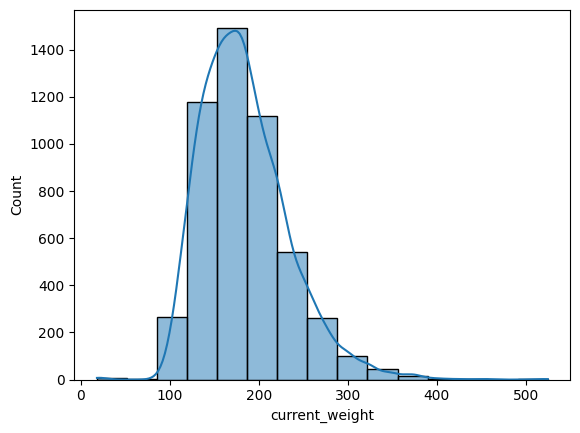

In [91]:
#Create a histogram with normal curve [kde =True]
sns.histplot(x ='current_weight' , data=df,  bins = 15 , kde =True)

<Axes: xlabel='current_weight'>

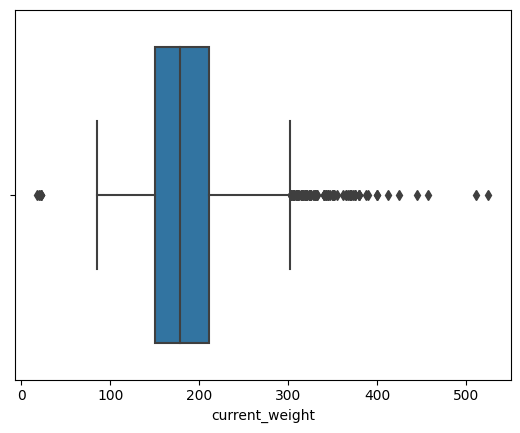

In [92]:
#Create a boxplot
sns.boxplot(x='current_weight', data = df)

Codebook 2:

In [59]:
#Manage data for variable 2 (been_in_military)

In [60]:
#frequency table for H4MI1
df['H4MI1'].value_counts()

0    4763
     1390
1     351
Name: H4MI1, dtype: int64

In [61]:
#Create new variable 'been_in_military'
df['been_in_military'] = df['H4MI1']
df['been_in_military'].value_counts()

0    4763
     1390
1     351
Name: been_in_military, dtype: int64

In [62]:
#Remove missing values
df['been_in_military'] = df['been_in_military'].loc[ df['been_in_military'] !=' ']
df['been_in_military'].value_counts()

0    4763
1     351
Name: been_in_military, dtype: int64

In [63]:
#Remove response of refused and I don't know (6 and 8)
df['been_in_military'] = df['been_in_military'].loc[ df['been_in_military'] !='6']
df['been_in_military'] = df['been_in_military'].loc[ df['been_in_military'] !='8']
df['been_in_military'].value_counts()

0    4763
1     351
Name: been_in_military, dtype: int64

In [64]:
#Format names from numbers
df['been_in_military'].replace(['0','1'] , ['NO','YES'], inplace = True)
df['been_in_military'].value_counts()

NO     4763
YES     351
Name: been_in_military, dtype: int64

In [65]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
#import researchPy
import researchpy as rp

In [67]:
#Create a Frequency table using ResearchPy
rp.summary_cat(df['been_in_military'])

,Variable,Outcome,Count,Percent
0,been_in_military,NO,4763,93.14
1,,YES,351,6.86


In [68]:
#Graphs and tables or statistics

<Axes: title={'center': 'Have you ever been in the military?'}, xlabel='Been in Military', ylabel='Percent'>

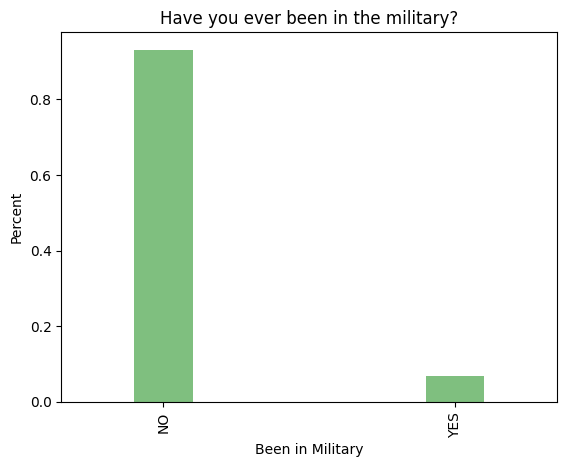

In [69]:
plt.xlabel("Been in Military")
plt.ylabel("Percent")
plt.title("Have you ever been in the military?")
df['been_in_military'].value_counts(normalize = True).plot(kind ='bar', color = 'green', width = 0.2, alpha = 0.5)

<Axes: title={'center': 'Have you ever been in the military?'}, ylabel='been_in_military'>

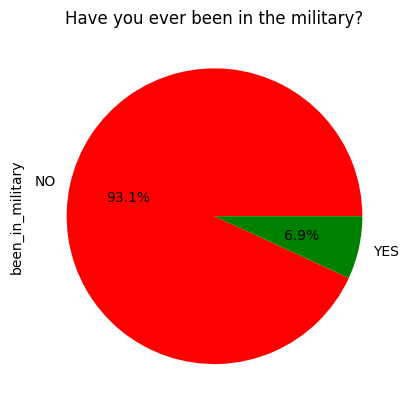

In [73]:
plt.title("Have you ever been in the military?")
df['been_in_military'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=['red','green'])